In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_excel('/home/dk/Data science/default of credit card clients.xls',header=1)

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION'] = 4
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

Level 5,6 and 0 are not expected in data , these are missing values. so better to consider in others category.

In [5]:
fil = (df.MARRIAGE == 0) 
df.loc[fil, 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

0 is not expected , it might be null value.so consider in others category.

In [6]:
df.loc[:,'PAY_0']=df.loc[:,'PAY_0']+1
df['Duly_payer']=np.where((df['PAY_0']==-1)&(df['PAY_2']==-1)&(df['PAY_3']==-1)&(df['PAY_4']==-1)&(df['PAY_5']==-1)&(df['PAY_6']==-1),1,0)
df['Fallible_payer']=np.where((df['PAY_0']>0)&(df['PAY_2']>0)&(df['PAY_3']>0)&(df['PAY_4']>0)&(df['PAY_5']>0)&(df['PAY_6']>0),1,0)
df['Monitor_payer']=np.where((df['PAY_0']+df['PAY_2']+df['PAY_3']+df['PAY_4']+df['PAY_5']+df['PAY_6'])>=6,1,0)
df['No_transact']=np.where((df['PAY_0']==0)&(df['PAY_2']==0)&(df['PAY_3']==0)&(df['PAY_4']==0)&(df['PAY_5']==0)&(df['PAY_6']==0),1,0)

Description for PAY_0 to PAY_6(-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

Duly_payer = One who pays every month (PAY_0 (September, 2005 )to PAY_6(April, 2005) without delay.
Falliable_payer=One who delay every month
Monitor_payer= whoose sum across six payments is more than 6 is Serious threat to the bank 
NO_tranct= customers not completed any transaction

In [7]:
df['Totalbillamount']=df['BILL_AMT1']+df['BILL_AMT2']+df['BILL_AMT3']+df['BILL_AMT4']+df['BILL_AMT5']+df['BILL_AMT6']
df['Totalpaymentamount']=df['PAY_AMT1']+df['PAY_AMT2']+df['PAY_AMT3']+df['PAY_AMT4']+df['PAY_AMT5']+df['PAY_AMT6']

Above are aggregated varibles for bill and payment. Instead individually processing BILL_AMT1 to BILL_AMT6, it is better to capture the essence in as ingle varible.

In [8]:
x=df.drop(['ID','default payment next month','PAY_0',
       'PAY_2','SEX','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5','PAY_AMT6','EDUCATION','MARRIAGE'],axis=1)
y=df['default payment next month']

In [9]:
df_fop=x

In [10]:
df_fop.head()

,LIMIT_BAL,AGE,Duly_payer,Fallible_payer,Monitor_payer,No_transact,Totalbillamount,Totalpaymentamount
0,20000,24,0,0,0,0,7704,689
1,120000,26,0,0,0,0,17077,5000
2,90000,34,0,0,0,0,101653,11018
3,50000,37,0,0,0,0,231334,8388
4,50000,57,0,0,0,0,109339,59049


# Outlier analysis

In [11]:
q=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,1]
df_fop['LIMIT_BAL'].quantile(q)

0.10      30000.0
0.20      50000.0
0.30      70000.0
0.40     100000.0
0.50     140000.0
0.60     180000.0
0.70     210000.0
0.80     270000.0
0.90     360000.0
0.95     430000.0
1.00    1000000.0
Name: LIMIT_BAL, dtype: float64

Variance across all quartiles is same except 90% to 100% quartile.

In [12]:
print(len(df_fop[df_fop['LIMIT_BAL']>=360000.0]))
print(len(df_fop[df_fop['LIMIT_BAL']>=430000.0]))


3357
1558


3357 (11%)number of observations present in between 90% to 100% quartile. since 11% here is a huge number do not wanted to impute biased values. so further it is divide to 95% to 100% quartiles, now 1558 (5.8%)values in this range, so values above 95% quartile are replaced with 430000.0

In [13]:
df_fop['LIMIT_BAL']=df_fop['LIMIT_BAL'].apply(lambda x:430000.0 if x >=430000.0 else x)

In [14]:
q=[0.1,0.15,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,1]
x['Totalbillamount'].quantile(q)

0.10       4183.70
0.15       9386.10
0.20      17167.00
0.30      44241.10
0.40      82584.60
0.50     126311.00
0.60     188873.00
0.70     277665.20
0.80     435210.80
0.90     743599.40
0.95    1046422.05
1.00    5263883.00
Name: Totalbillamount, dtype: float64

variance in quartile 90% to 100% too high.so this would be treated as below.

In [15]:
print(len(df_fop[df_fop['Totalbillamount']<17167.0]))
print(len(df_fop[df_fop['Totalbillamount']>743599.4]))
print(len(df_fop[df_fop['Totalbillamount']>1046422.05]))
print(len(df_fop[df_fop['Totalbillamount']<9386.10]))

6000
3000
1500
4500


In [16]:
df_fop['Totalbillamount']=df_fop['Totalbillamount'].apply(lambda x:  1046422.05 if x >=  1046422.05 else x)

1500(5% of total) values lie in the 95% to 100% quartile , this outliers are imputed with 95% quartile value(1046422.05)

In [17]:
q=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.97,1]
df_fop['Totalpaymentamount'].quantile(q)

0.10       2424.40
0.20       5480.80
0.30       7840.00
0.40      10530.20
0.50      14383.00
0.60      20046.80
0.70      28186.60
0.80      40864.40
0.90      71749.60
0.95     118317.05
0.97     159674.30
1.00    3764066.00
Name: Totalpaymentamount, dtype: float64

In [18]:
df_fop['Totalpaymentamount']=df_fop['Totalpaymentamount'].apply(lambda x: 159674.30 if x >= 159674.30 else x)

In [19]:
df_fop.corr()

,LIMIT_BAL,AGE,Duly_payer,Fallible_payer,Monitor_payer,No_transact,Totalbillamount,Totalpaymentamount
LIMIT_BAL,1.000000,0.142867,0.020654,-0.125928,-0.220592,0.014100,0.251662,0.426962
AGE,0.142867,1.000000,0.008834,0.004426,-0.017655,-0.024688,0.041749,0.044338
Duly_payer,0.020654,0.008834,1.000000,-0.007178,-0.012219,-0.003330,-0.022012,0.010721
Fallible_payer,-0.125928,0.004426,-0.007178,1.000000,0.587450,-0.021704,0.043375,-0.086743
Monitor_payer,-0.220592,-0.017655,-0.012219,0.587450,1.000000,-0.036946,0.055410,-0.134600
No_transact,0.014100,-0.024688,-0.003330,-0.021704,-0.036946,1.000000,0.017511,0.025712
Totalbillamount,0.251662,0.041749,-0.022012,0.043375,0.055410,0.017511,1.000000,0.406529
Totalpaymentamount,0.426962,0.044338,0.010721,-0.086743,-0.134600,0.025712,0.406529,1.000000


# Assumptions check

In [20]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
ck = np.column_stack([df_fop])


vif = [variance_inflation_factor(ck, i) for i in range(ck.shape[1])]


In [21]:
print(vif)

[3.611044077669753, 3.319704971496027, 1.002541931753462, 1.5991757790918049, 1.787096582814207, 1.0105794492193332, 2.085796318329433, 2.251242107376902]


All VIF values are less than 5, indicates that values are not highly correlated.

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df_fop,y,test_size=0.33,random_state=28,stratify=y)

# Logistic regression

In [23]:
from sklearn.linear_model import LogisticRegression
logreg =LogisticRegression()
result=logreg.fit(x_train,y_train)
y_predict=logreg.predict(x_test)
logis_score_train = logreg.score(x_train, y_train)
print("Training score: ",logis_score_train)
logis_score_test = logreg.score(x_test, y_test)
print("Testing score: ",logis_score_test)

Training score:  0.7788059701492537
Testing score:  0.7787878787878788


In [24]:
from sklearn.metrics import  confusion_matrix
confusion_matrix(y_test, y_predict)

array([[7710,    0],
       [2190,    0]])

Due to imbalance model is not able to predict defaulters so, under and over sampling techniques has to be applied to this data. This is done in another file.

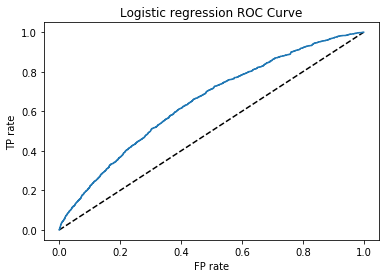

0.6475566630539713

In [25]:
#ROC Curve
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
y_pred_prop=logreg.predict_proba(x_test)[:,1] #Filter column of prob leaving target
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prop)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='logistic regression')
plt.xlabel('FP rate')
plt.ylabel('TP rate')
plt.title('Logistic regression ROC Curve')
plt.show()
#AUC of ROC Curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_prop)

In [26]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print(f1_score(y_test, y_predict, average="macro"))
print(precision_score(y_test, y_predict, average="macro"))
print(recall_score(y_test, y_predict, average="macro"))

0.43781942078364566
0.3893939393939394
0.5


In [27]:
import statsmodels.api as sm
logit = sm.Logit(y_train,x_train)

# fit the model
result = logit.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.482840
         Iterations 7
                               Logit Regression Results                               
Dep. Variable:     default payment next month   No. Observations:                20100
Model:                                  Logit   Df Residuals:                    20092
Method:                                   MLE   Df Model:                            7
Date:                        Tue, 04 Sep 2018   Pseudo R-squ.:                 0.08625
Time:                                11:30:11   Log-Likelihood:                -9705.1
converged:                               True   LL-Null:                       -10621.
                                                LLR p-value:                     0.000
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
LIMIT_BAL          -1.893e-0

# SMOTE

In [28]:
from imblearn.over_sampling import SMOTE 
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 4446
Before OverSampling, counts of label '0': 15654 

Before OverSampling, counts of label '1': 4446
Before OverSampling, counts of label '0': 15654 

After OverSampling, the shape of train_X: (31308, 8)
After OverSampling, the shape of train_y: (31308,) 

After OverSampling, counts of label '1': 15654
After OverSampling, counts of label '0': 15654


In [29]:
logreg1 =LogisticRegression(class_weight='balanced')
result=logreg1.fit(X_train_res,y_train_res)
y_predict1=logreg1.predict(x_test)
logis_score_train = logreg1.score(X_train_res, y_train_res)
print("Training score: ",logis_score_train)
logis_score_test = logreg1.score(x_test, y_test)
print("Testing score: ",logis_score_test)

Training score:  0.6078638047783315
Testing score:  0.544040404040404


In [30]:
from sklearn.metrics import  confusion_matrix
confusion_matrix(y_test, y_predict1)

array([[3768, 3942],
       [ 572, 1618]])

In [35]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print(f1_score(y_test, y_predict1, average="macro"))
print(precision_score(y_test, y_predict1, average="macro"))
print(recall_score(y_test, y_predict1, average="macro"))

0.5214712889840718
0.5796049796107814
0.6137643693477605


# Adaptive synthetic sampling (ADASYN)

In [31]:
from imblearn.over_sampling import ADASYN 
ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_sample(x_train, y_train)

In [32]:
logreg2 =LogisticRegression()
result=logreg2.fit(X_res,y_res)
y_predict2=logreg2.predict(x_test)
logis_score_train = logreg2.score(X_res, y_res)
print("Training score: ",logis_score_train)
logis_score_test = logreg2.score(x_test, y_test)
print("Testing score: ",logis_score_test)

Training score:  0.5588731115865915
Testing score:  0.5608080808080808


In [33]:
from sklearn.metrics import  confusion_matrix
confusion_matrix(y_test, y_predict2)

array([[4011, 3699],
       [ 649, 1541]])

In [34]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
print(f1_score(y_test, y_predict2, average="macro"))
print(precision_score(y_test, y_predict2, average="macro"))
print(recall_score(y_test, y_predict2, average="macro"))

0.5316546457314891
0.5774067915997771
0.6119432155357746
